#  Cartoon characters

## Task description
The task is to implement a deep learning classifier of characters from the Simpsons TV show. The dataset has benn preprocessed, each image haivng the same resolution


## Dataset preparations
First download the data and extract it:

In [ ]:
# Downloading the dataset
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" -o simpsons_dataset_train.pkl

!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" -o simpsons_dataset_test.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3138      0 --:--:-- --:--:-- --:--:--  3138
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  129M  100  129M    0     0  70.3M      0  0:00:01  0:00:01 --:--:--  122M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    511      0 --:--:-- --:--:-- --:--:--   511
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 32.4M  100 32.4M    0     0  26.3M      0  0:00:01  0:00:01 --:--:-- 26.3M


This downloads two Python pickle files, one for the training (`simpsons_dataset_train.pkl`) and one for the test set (`simpsons_dataset_test.pkl`). Both files contain a dictionary, the key `features` holds the images, the key `labels` the label ids. The following code loads the dataset:

In [ ]:
import pickle
with open('simpsons_dataset_test.pkl', 'rb') as f:
    test = pickle.load(f)
with open('simpsons_dataset_train.pkl', 'rb') as f:
    train = pickle.load(f)
    





x_test, y_test = test['features'], test['labels']
x_train, y_train = train['features'], train['labels']


print(x_train.shape)
print(y_train.shape)

Let's split the training set into a training and validation set, making sure in the validation set the classes have a similar distribution to the training set.


In [ ]:

from sklearn.model_selection import train_test_split


seed=5
x_train,  x_valid,y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)



Now that we have set up the dataset, it's time to look at some of the images. Here's a function that randomly selects 4 images from a class and shows them. 

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
import numpy as np


def draw_images(imgs, labels, class_to_draw):
    """
    imgs - a numpy array of size Nx64x64x3 where N is the number of images. imgs contains the 64x64 pixel images
    labels - array of length N, the class id of the images
    class_to_draw - id of the class from which to select images
    """
    
    arr = np.where(labels == class_to_draw)
    x = [random.randint(0, len(arr[0])) for p in range(4)]

    for i in range (4):
        plt.figure(i)

        imgplot = plt.imshow(image.array_to_img(imgs[arr[0][x[i]]]))



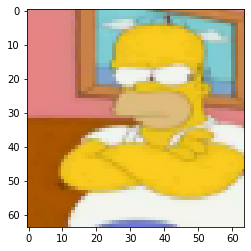

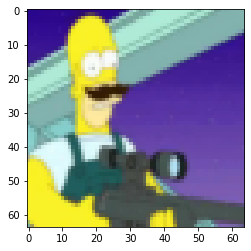

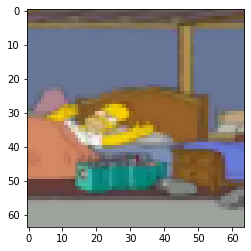

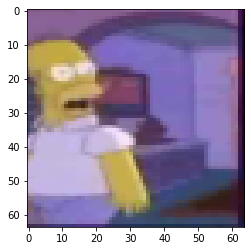

In [ ]:
# Show some images from class #2
draw_images(x_train, y_train, 2)


In [ ]:
# First, we should normalize the data
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(x_train.shape)
print(y_train.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')





datagen = ImageDataGenerator(rescale=1./255)

x_train_generator = datagen.flow(
        x_train, y_train,
        batch_size=57)

x_test_generator = datagen.flow(
        x_test, y_test,
        batch_size=40)

x_valid_generator = datagen.flow(
        x_valid, y_valid,
        batch_size=47) 



## Training the network

We implement and train the following modified LeNet architecture for 50 epochs. It has 322,146 parameters and the following layers:

- A convolutional layer with 5x5 kernel and 8 filters
- An AveragePooling layer
- A convolutional layer with 3x3 kernel and 16 filters
- An AveragePooling layer
- A fully connected layer of 100 units
- A fully connected layer of 60 units
- A fully connected layer with softmax activation, having the same number of units as classes

All layers have ReLU activations. 


In [ ]:

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


model = models.Sequential()
###
model.add(layers.Conv2D(filters=8, kernel_size=(5, 5), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.AveragePooling2D((2, 2)))
###
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
###
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
###
model.add(layers.Dense(60, activation='relu'))
###
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         608       
_________________________________________________________________
average_pooling2d (AveragePo (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history= model.fit(x_train_generator, 
                   steps_per_epoch=155,  
                   validation_data=x_valid_generator, 
                   validation_steps=47,
                   epochs=50)


Epoch 1/50
155/155 [==============================] - 34s 10ms/step - loss: 2.0348 - accuracy: 0.2650 - val_loss: 1.5708 - val_accuracy: 0.4880
Epoch 2/50
155/155 [==============================] - 1s 7ms/step - loss: 1.4884 - accuracy: 0.5058 - val_loss: 1.3938 - val_accuracy: 0.5573
Epoch 3/50
155/155 [==============================] - 1s 7ms/step - loss: 1.2194 - accuracy: 0.5987 - val_loss: 1.2301 - val_accuracy: 0.6080
Epoch 4/50
155/155 [==============================] - 1s 7ms/step - loss: 1.0562 - accuracy: 0.6616 - val_loss: 1.1950 - val_accuracy: 0.6166
Epoch 5/50
155/155 [==============================] - 1s 7ms/step - loss: 0.8947 - accuracy: 0.7080 - val_loss: 1.1793 - val_accuracy: 0.6383
Epoch 6/50
155/155 [==============================] - 1s 7ms/step - loss: 0.7640 - accuracy: 0.7544 - val_loss: 1.1272 - val_accuracy: 0.6464
Epoch 7/50
155/155 [==============================] - 1s 7ms/step - loss: 0.6338 - accuracy: 0.7885 - val_loss: 1.0996 - val_accuracy: 0.6768
Epoc

Now that the model has finished training, we plot the accuracy and loss over time, both for the training and the validation data

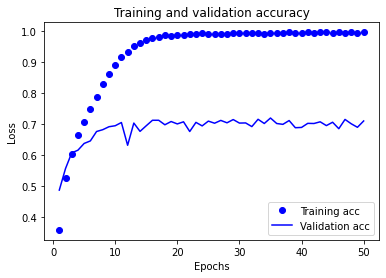

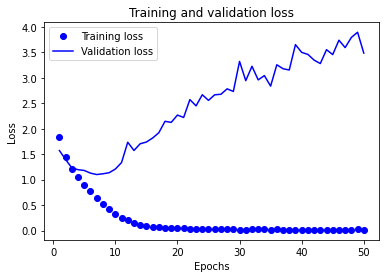

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.figure(0)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.figure(1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

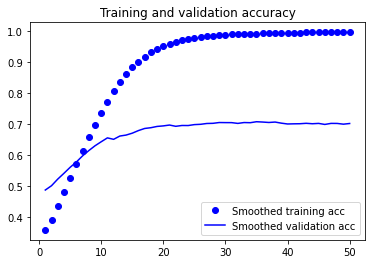

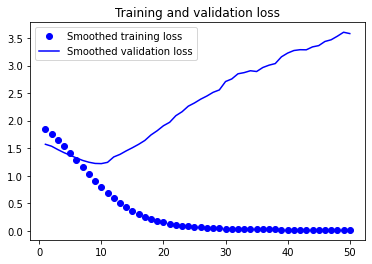

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that the training accuracy quickly skyrockets to nearly 100%, while the validation accuracy keeps at about 70%. This, along with the fact that by ~10th epoch the validation loss started to increase, implies overfitting. This can be mitigated by using data augmentation to expand our data set artifically. In addition to this a dropout layer could also be added.



In [ ]:
test_loss, test_acc = model.evaluate(x_test_generator, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.7830
test acc: 0.7829999923706055


## Improving the method

Let's add augmentations to the model, and retrain the network! 

In [ ]:
datagen2 = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255)


x2_train_generator = datagen2.flow(
        x_train, y_train,
        batch_size=57)

 

history2= model.fit(x2_train_generator, 
                    steps_per_epoch=155, 
                    validation_data=x_valid_generator, 
                    validation_steps=47,
                    epochs=50)




Epoch 1/50
155/155 [==============================] - 9s 60ms/step - loss: 2.2623 - accuracy: 0.4068 - val_loss: 1.1754 - val_accuracy: 0.6274
Epoch 2/50
155/155 [==============================] - 9s 60ms/step - loss: 1.5939 - accuracy: 0.4754 - val_loss: 1.0481 - val_accuracy: 0.6759
Epoch 3/50
155/155 [==============================] - 9s 60ms/step - loss: 1.4673 - accuracy: 0.5154 - val_loss: 1.0111 - val_accuracy: 0.6799
Epoch 4/50
155/155 [==============================] - 9s 60ms/step - loss: 1.3724 - accuracy: 0.5441 - val_loss: 0.9920 - val_accuracy: 0.6804
Epoch 5/50
155/155 [==============================] - 9s 60ms/step - loss: 1.3354 - accuracy: 0.5587 - val_loss: 0.9890 - val_accuracy: 0.6759
Epoch 6/50
155/155 [==============================] - 9s 59ms/step - loss: 1.2932 - accuracy: 0.5693 - val_loss: 0.9845 - val_accuracy: 0.6795
Epoch 7/50
155/155 [==============================] - 9s 60ms/step - loss: 1.2480 - accuracy: 0.5898 - val_loss: 0.9588 - val_accuracy: 0.6840

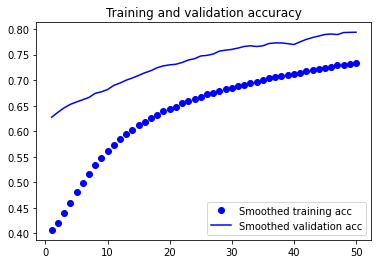

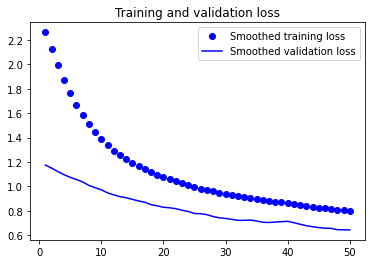

500/500 [==============================] - 0s 637us/step - loss: 0.6265 - accuracy: 0.7897
test acc: 0.7896639108657837


In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
test_loss, test_acc = model.evaluate(x_test_generator, steps=50)
print('test acc:', test_acc)



The first model overfits, but it trained rather quickly, and with the validation loss spike upwards, this training time could be cut even shorter with the Early Stopping callback.
The second model includes data augmentation. This results in a longer time to train, but the results are much better, the validation and training curves on the plots are close to each other, reaching ~78%. If the model was to be trained for a greater number of epochs, the accuracy might even improve further. 

